# CMSC478 - Assignment 0: Tech Setup and Getting Started with ML

## Instructor: Fereydoon Vafaei

Brian Jon Stout - AK37018

## Overview and Learning Objectives

This assignment prepares you for the upcoming assignments to make sure that you have setup the frameworks properly. It also provides some interesting resources (a few articles and videos) to get started with the ML world.

<b>Note</b>: You must download this notebook as .ipynb file, complete it on your own computer (do NOT run it on colab), and then submit the completed notebook as an .ipynb file to Blackboard.

# Part 1 - Python Setup

In <b>Part 1</b> of this Jupyter Notebook, you should run the following cell and make sure that your Python version is correct. Depending on what OS you're using, your output might be slightly different but the Python version must be 3.5 or higher.

In [4]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


> Next, run the following cell which is an example from [matplotlib documentstion](https://matplotlib.org/stable/gallery/index.html).

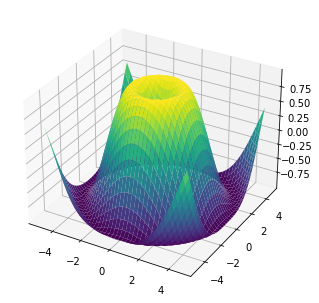

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

>Next, run the following classifier comparison example from [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

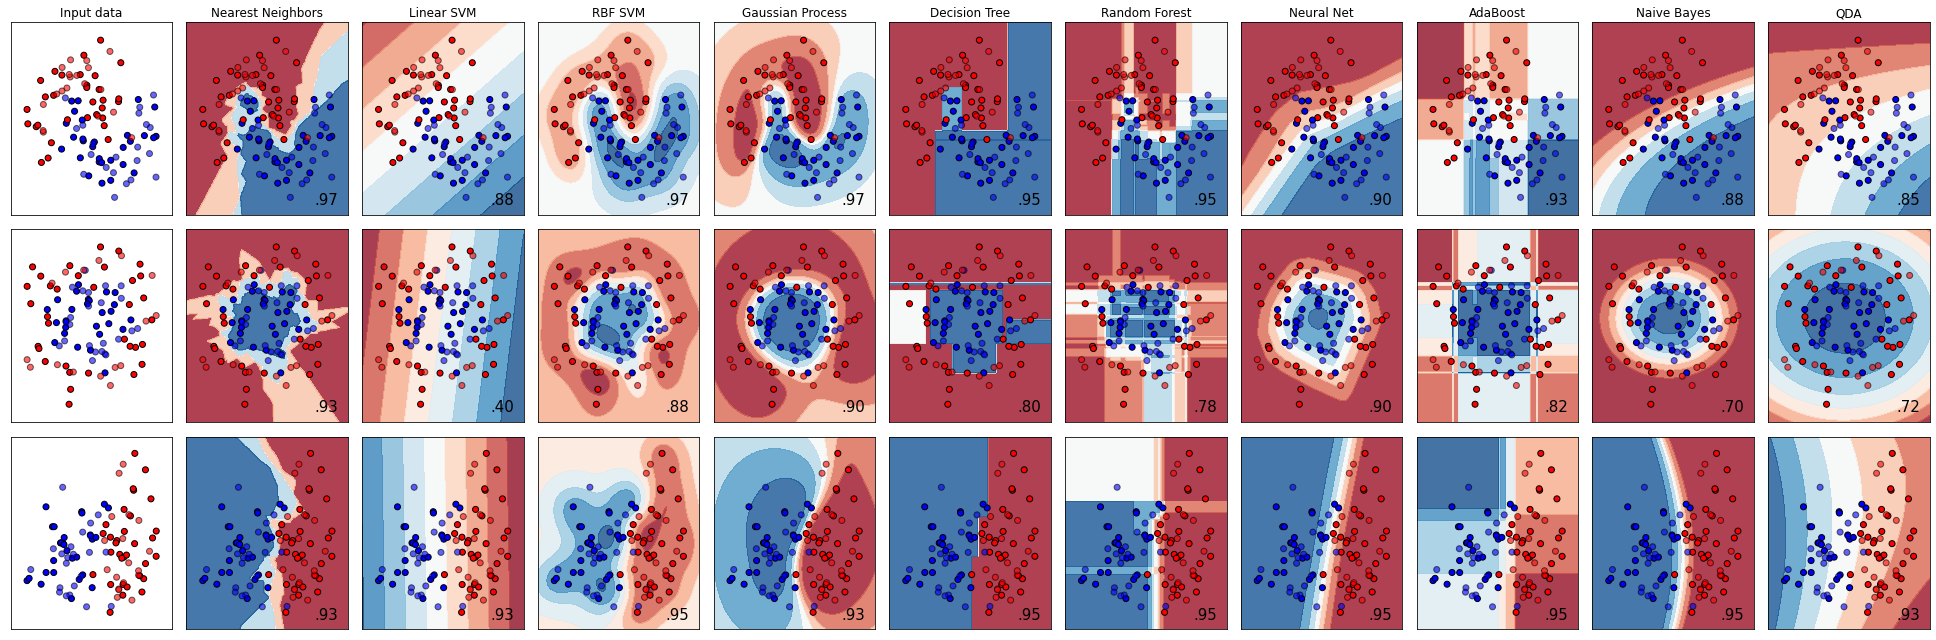

In [8]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Part 2 - GAN Talk by Ian Goodfellow

In Part 2, watch the first 10 minutes of [Ian Goodfellow's talk](https://www.youtube.com/watch?v=sucqskXRkss) - the author of the [Deep Learning textbook](http://www.deeplearningbook.org/) - at ICLR-2019 conference where he discusses the recent advances in Adversarial Machine Learning. Don't worry if you don't fully understand what he explains. Generative Adversarial Network (GAN) is an advanced topic, and we've just started the basics of ML! Feel free to watch the entire talk.

SUMMARY:

Adversial Networks use game theory versus optimization.  The idea to train a machine learning algorithm with adversial machine learning, is that one part trains on a data set attempting to produce results, and another part is being tasked with determining if the result is "real" or "fake" which is also being trained to detect fakes.  The result is a unsupervised/semi-supervised learning algorithm which eventually reaches "nash" equilibrium from game theory where the detector is basically making coin flips.



## Part 3 - Twitter Investigation

Read the following article from BBC:

https://www.bbc.com/news/technology-54234822

Summarize the article in at least a paragraph in the following cell. Your summary should include the twitter investigation, what users found, what Zehan Wang found, and what a US government study about facial recognition suggested. DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

SUMMARY: The article is a summary of different events regarding Twitter's picture-cropping algorithm where it was discovered the algorithm had racial bias.  Users found that certain faces were previewed over others, different political leaders were favored over others, and a white man in a suit was preferred over a black man in the same attire.  Other difference like facial hair and glasses also caused issues.

Zehan Wang originally determined through studies that there is no racial bias (or genders) but because of the issues raised they would look over the previous studies.

The U.S. government determined that facial-recognition software has difficulty accurately determining the identity of black and asian faces.

## Part 4 - Computer Vision

Read the following article: ["Understanding the differences between biological and computer vision"](https://bdtechtalks.com/2021/05/10/biological-computer-vision/). Summarize the following FOUR key takeaways from the article based on the book: [Biological and Computer Vision](https://www.cambridge.org/core/books/biological-and-computer-vision/BB7E68A69AFE7A322F68F3C4A297F3CF). Your summary should include ALL of the following FOUR differences:
- Hardware differences
- Architecture differences
- Goal differences
- Integration differences

DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Biological runs on the brain which contains an immense amount of neurons.  Computers run on processors, and when emulating neural networks with machine learning, still need to emulate the neural connections.  Even when emulating the human vision process, there's some differences like how computer vision doesn't have backwards feedback but biological vision does.  Another huge difference is that biological vision is general purposed, but computer vision is highly specialized.  For computer vision to complete multiple tasks it needs seperate algorithms designed to solve those tasks.  Not to say this a huge fault of computer vision.  Biological vision is deeply integrated into other body systems like smell, feel, and hearing.  Completely emulating all the things the brain processes when it "see's" things is immensely complicated and is a system we've developed all our lives.


    

## Part 5 - Semi-Supervised Learning

Read the following article: ["What is semi-supervised Machine Learning?"](https://bdtechtalks.com/2021/01/04/semi-supervised-machine-learning/) and summarize the article.

Your summary must briefly explain ALL the techniques mentioned in the article and should also include a summary of the limitations of semi-supervised learning. DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

SUMMARY:

Semi-supervised training is a middle ground between unsupervised and supervised training where it requires some labeling (supervision) for a data-set to train on, but a unsupervised portion of the algorithm can assist in labeling to introduce some automation.  A typical strategy is to create classes which clusters can fall into, so the clustering algorithm can group the most common forms of various different forms of something.  After the clusters are grouped they represent the most average features of a form and the user can label them manually.

## Part 6 - Interpolation, Extrapolation and Linearisation

Watch the following video COMPLETELY:

https://www.youtube.com/watch?v=86ib0sfdFtw

Summarize the discussions in the video. Your summary should be at least FIVE paragraphs with the following headlines:

- Interpolation
- Extrapolation
- Linearisation
- Why is it important to distinguish between interpolation and extrapolation?
- Can DL models reason?

Your summary goes HERE:

- **Interpolation**:
Interpolation is determining an unknown data point within the range of collected data.


- **Extrapolation**:
Extrapolation is determing an unknown data point outside the range of collected data.

- **Linearisation**:
Linearisation is taking apart non-linear functions and representing them with linear functions

- **Why is it important to distinguish between interpolation and extrapolation?**
It is important because for practical reasons it might be more important to focus on interpolation vs. extrapolation and understanding the difference between them will allow an engineer to make a more efficient program.  Extrapolation also represents goal in machine learning for machine learning to reason.  Biological learning is able to extrapolate, or learn outside of the examples they've been exposed to.  If a machine could do the same thing it'd be incredibly useful.  Extrapolation in machine learning requires an algorithm to be generalized.  If an algorithm is trained to be too specialized, if it attempts to extrapolate the results may be wildly inaccurate.

Machine Learning is also a rapidly advancing field, and it helps to have a common language and understanding between academics.

Even just the arguments on how to defined interpolation vs extrapolation lead to useful discussions on how extrapolation always results from high dimensionality, or how the intution of what interpolation is more practical to a machine learning engineering than a hard definition.

- **Can DL models reason?**
Like Professor LeCun says the short answer is no, currently.  Deeplearning models aren't currently generalized enough to do useful learning/reasoning without supervision.  




##  Grading

- Assignment-0 has 35 points. Parts 1-5 have 5 points each. Part 6 has 10 points.

- Grading will be based on completeness and correctness of all the required tasks, prompts and summaries.

- <b>Note:</b> Incomplete summaries will get ZERO. Copy/pasted summaries will get ZERO and will be reported as academic misconduct.

- Points will be deducted if you have mistakes in naming the files.

## Submission

Name your completed notebook ```Lastname-A0.ipynb```.  

Submit the .ipynb file using the ```Assignment-0``` link on Blackboard.
  
<font color=red><b>Due Date: Thursday Feb 10, 11:59PM</b></font>